In [23]:
import numpy as np


np.random.seed(0)  # for reproducibility

# 1) 300 points from N([0, 0], [[0.16, 0],[0, 0.16]])
mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.16, 0.0],
                 [0.0,  0.16]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)

# 2) 100 points from N([0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# 3) 100 points from N([-0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)

# Combine all data
data_X = np.vstack([data1, data2, data3])
N, d = data_X.shape  # should be (500, 2)

In [24]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=0)
gm.fit(data_X)
data_X

array([[ 0.70562094,  0.16006288],
       [ 0.39149519,  0.89635728],
       [ 0.7470232 , -0.39091115],
       [ 0.38003537, -0.06054288],
       [-0.04128754,  0.1642394 ],
       [ 0.05761743,  0.5817094 ],
       [ 0.30441509,  0.04867001],
       [ 0.17754529,  0.13346973],
       [ 0.59763163, -0.08206331],
       [ 0.12522708, -0.3416383 ],
       [-1.02119593,  0.26144744],
       [ 0.34577448, -0.29686601],
       [ 0.90790185, -0.58174627],
       [ 0.01830341, -0.07487354],
       [ 0.61311169,  0.58774351],
       [ 0.06197897,  0.15126501],
       [-0.3551143 , -0.79231859],
       [-0.13916486,  0.06253959],
       [ 0.49211627,  0.48095194],
       [-0.15493073, -0.1209211 ],
       [-0.41942119, -0.56800717],
       [-0.68250808,  0.78031016],
       [-0.20386087, -0.17522972],
       [-0.50111814,  0.31099614],
       [-0.64555914, -0.08509611],
       [-0.35818662,  0.154761  ],
       [-0.20432206, -0.47225287],
       [-0.01127289,  0.17133275],
       [ 0.02660689,

In [25]:
import numpy as np
x = np.linspace(data_X[:, 0].min() - 0.5, data_X[:, 0].max() + 0.5, 200)
y = np.linspace(data_X[:, 1].min() - 0.5, data_X[:, 1].max() + 0.5, 200)
X, Y = np.meshgrid(x, y)
grid = np.array([X.ravel(), Y.ravel()]).T
grid

array([[-1.81655933, -1.71845722],
       [-1.79838848, -1.71845722],
       [-1.78021762, -1.71845722],
       ...,
       [ 1.76309838,  1.85187102],
       [ 1.78126923,  1.85187102],
       [ 1.79944008,  1.85187102]])

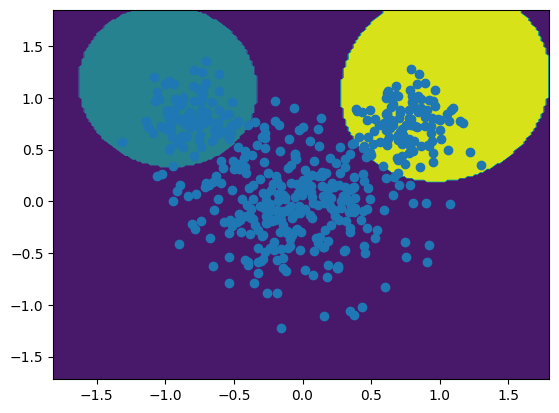

In [26]:
from matplotlib import pyplot as plt

predictions = gm.predict(grid)
predictions = predictions.reshape(X.shape)
plt.figure()
plt.contourf(X, Y, predictions)
plt.scatter(data_X[:, 0], data_X[:, 1])
plt.show()

In [34]:
from sklearn.metrics import silhouette_score

for num_clusters in range(2, 8):
    gm = GaussianMixture(n_components=num_clusters, random_state=0)
    labels = gm.fit_predict(data_X)
    sh_score = silhouette_score(data_X, labels)
    
    print(f"{num_clusters}: {sh_score}")
    
    # Wybrałabym odpowiednią liczbę klastrów używając silhouette_score

2: 0.4036384582348402
3: 0.46502080468898876
4: 0.4160862804891494
5: 0.4193069860069103
6: 0.40788751339790374
7: 0.4160975524897698
